## Introduction

**Context**
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.
This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

**Content**
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

Food - refers to the total amount of the food item available as human food during the reference period. \
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['font.size'] = 14

## Load The Data

In [2]:
df = pd.read_csv('dataset/FAO.csv',encoding = 'cp1254')

In [3]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
df.shape

(21477, 63)

## Data Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [6]:
#change the data type of Y2012 and Y2013 to float
df[['Y2012','Y2013']] = df[['Y2012','Y2013']].astype('float')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area Code,21477.0,125.449411,72.868149,1.0,63.00,120.00,188.00,276.00
Item Code,21477.0,2694.211529,148.973406,2511.0,2561.00,2640.00,2782.00,2961.00
Element Code,21477.0,5211.687154,146.820079,5142.0,5142.00,5142.00,5142.00,5521.00
latitude,21477.0,20.450613,24.628336,-40.9,6.43,20.59,41.15,64.96
longitude,21477.0,15.794445,66.012104,-172.1,-11.78,19.15,46.87,179.41
Y1961,17938.0,195.262069,1864.124336,0.0,0.00,1.00,21.00,112227.00
Y1962,17938.0,200.782250,1884.265591,0.0,0.00,1.00,22.00,109130.00
Y1963,17938.0,205.464600,1861.174739,0.0,0.00,1.00,23.00,106356.00
Y1964,17938.0,209.925577,1862.000116,0.0,0.00,1.00,24.00,104234.00
Y1965,17938.0,217.556751,2014.934333,0.0,0.00,1.00,25.00,119378.00


In [8]:
df.Item.unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products', 'Sugar cane',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Sweeteners, Other',
       'Honey', 'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine 

In [9]:
df.Item.nunique()

115

#### There are 114 kind of food and feed items.

## Drop Unecessary Row And Columns

In [10]:
#remove rows where more than a half of prodcution records are null
null_rows = df.iloc[:,9:].isnull().sum(axis = 1) > 26
df = df.loc[~null_rows]

In [11]:
#number of rows with null values
df.isnull().sum(axis = 1).sum()

0

In [12]:
df.Unit.unique()

array(['1000 tonnes'], dtype=object)

In [13]:
#Drop column unit since there is only one unit
df.drop('Unit',axis = 1,inplace = True)

## Produciton Of Worldwide Level

### Food and Feed Production From Year 1961-2013

In [14]:
world_food = df.iloc[:,9:].loc[df.Element == 'Food'].sum(axis = 0)
world_feed = df.iloc[:,9:].loc[df.Element == 'Feed'].sum(axis = 0)

Text(0.5, 1.0, 'Food and Feed Producing From Year 1961-2013')

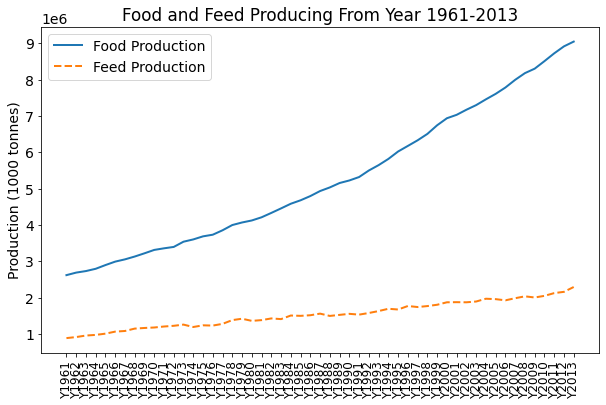

In [15]:
plt.plot(world_food,label = 'Food Production',linewidth = 2)
plt.plot(world_feed,label = 'Feed Production',linestyle='dashed',linewidth = 2)
plt.xticks(rotation = 90,fontsize = 12)
plt.ylabel('Production (1000 tonnes)')
plt.legend()

plt.title('Food and Feed Producing From Year 1961-2013')

#### We can easily see that the total consumption or production is growing over the time. Especially, the food produciton seems to grow more rapidly. 

### Top 10 Food Producing / Consumed Of All Time

Text(0.5, 0, 'Proportion (%)')

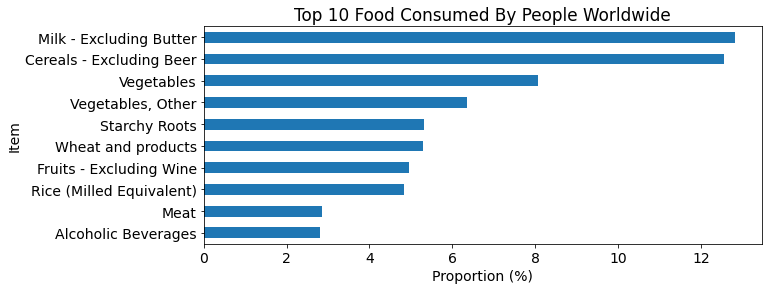

In [16]:
ts_food_item = df[df.Element == 'Food'].groupby('Item').sum().iloc[:,5:]

ax = (ts_food_item.sum(1)/ts_food_item.sum(1).sum(0) * 100) \
                            .sort_values()[-10:] \
                            .plot(kind = 'barh',figsize = (10,4),title = 'Top 10 Food Consumed By People Worldwide')

ax.set_xlabel('Proportion (%)')

### Top 5 Feed Produced/Consumed Of All Time

Text(0.5, 0, 'Proportion (%))')

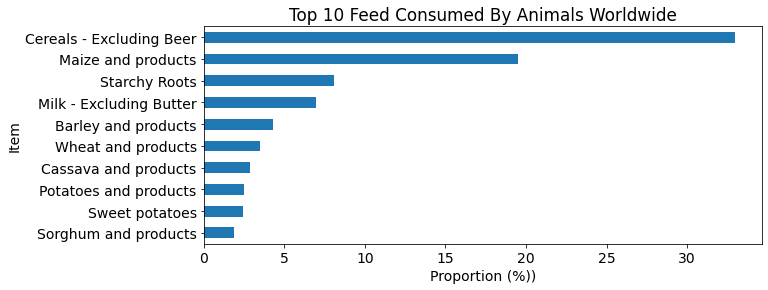

In [17]:
ts_feed_item = df[df.Element == 'Feed'].groupby('Item').sum().iloc[:,5:]

ax = (ts_feed_item.sum(1)/ts_feed_item.sum(1).sum(0) * 100) \
                            .sort_values()[-10:] \
                            .plot(kind = 'barh',figsize = (10,4),title = 'Top 10 Feed Consumed By Animals Worldwide')

ax.set_xlabel('Proportion (%))')

### Top 5 Food Items With Highest Average Growth Rate Over The Last 10 Years

In [18]:
ts_food_item_trans = ts_food_item.transpose()
ts_food_item_trans.index = pd.to_datetime(ts_food_item_trans.index.str.replace('Y',''),format= '%Y')

#average growth rate every decade
avg_pct_change_dec = ts_food_item_trans.groupby(ts_food_item_trans.index.year // 10).mean().pct_change() * 100
#the average growth rate last decade
avg_pct_change_dec.iloc[-1].sort_values(ascending = False)

Item
Miscellaneous            66.093535
Infant food              66.093535
Sugar beet               53.179191
Spices, Other            47.076085
Citrus, Other            44.593186
                           ...    
Palm kernels            -11.971831
Sweet potatoes          -15.013078
Fish, Body Oil          -40.089358
Cottonseed                     NaN
Meat, Aquatic Mammals          NaN
Name: 201, Length: 115, dtype: float64

There are two abnormal values. Let's find out the production
of the corresponding items.

In [19]:
ts_food_item_trans[['Cottonseed','Meat, Aquatic Mammals']]

Item,Cottonseed,"Meat, Aquatic Mammals"
1961-01-01,0.0,0.0
1962-01-01,0.0,0.0
1963-01-01,0.0,0.0
1964-01-01,0.0,0.0
1965-01-01,0.0,0.0
1966-01-01,0.0,0.0
1967-01-01,0.0,0.0
1968-01-01,0.0,0.0
1969-01-01,0.0,0.0
1970-01-01,0.0,0.0


Except in 1985, the total production of cotton seed was 0, we should expect that the need of cotton seed in the following years is 0 too.

The production of Meat, Aquatic Mammals was 0 over the years. We can remove rows of these two food items.

In [20]:
df = df[~((df.Element == 'Food') & ((df.Item == 'Meat, Aquatic Mammals') | (df.Item == 'Cottonseed')))]

In [21]:
#top 5 food items with the highest average growth rate over the last 10 years
top5_avg_pct_change = avg_pct_change_dec.iloc[-1].sort_values(ascending = False)[:5]
top5_avg_pct_change

Item
Miscellaneous    66.093535
Infant food      66.093535
Sugar beet       53.179191
Spices, Other    47.076085
Citrus, Other    44.593186
Name: 201, dtype: float64

Text(0, 0.5, 'Growth Rate (%)')

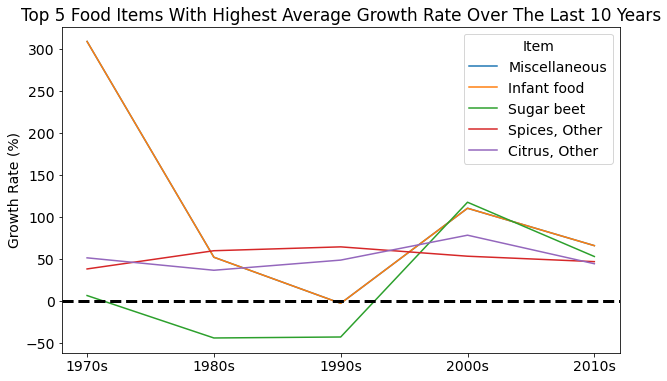

In [22]:
fig, ax = plt.subplots(1, 1)

avg_pct_change_dec.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Top 5 Food Items With Highest Average Growth Rate Over The Last 10 Years',
                      ax = ax)

ax.axhline(y = 0,color='black', linestyle='--', lw=3)
ax.set_xticks(avg_pct_change_dec.index[1:])
ax.set_xticklabels(['1970s','1980s','1990s','2000s','2010s'])
ax.set_ylabel('Growth Rate (%)')

Text(0, 0.5, 'Prodcution (1000 tones)')

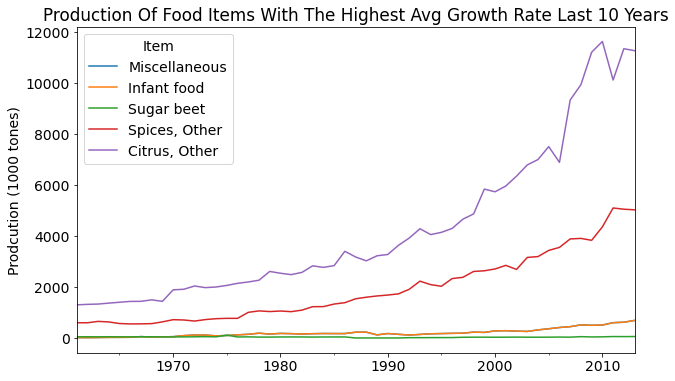

In [23]:
ax = ts_food_item_trans.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Production Of Food Items With The Highest Avg Growth Rate Last 10 Years')

ax.set_ylabel('Prodcution (1000 tones)')

### Top 5 Feed Items With Highest Average Growth Rate Over The Last 10 Years

In [24]:
ts_feed_item_trans = ts_feed_item.transpose()
ts_feed_item_trans.index = pd.to_datetime(ts_feed_item_trans.index.str.replace('Y',''),format= '%Y')

#average growth rate every decade
avg_pct_change_dec = ts_feed_item_trans.groupby(ts_feed_item_trans.index.year // 10).mean().pct_change() * 100
#the average growth rate last decade
avg_pct_change_dec.iloc[-1].sort_values(ascending = False)

Item
Olive Oil                              inf
Freshwater Fish                 626.585014
Crustaceans                     228.413284
Butter, Ghee                    110.000000
Soyabeans                        73.696682
                                   ...    
Olives (including preserved)           NaN
Palm Oil                               NaN
Poultry Meat                           NaN
Stimulants                             NaN
Tea (including mate)                   NaN
Name: 201, Length: 82, dtype: float64

In [25]:
avg_pct_change_dec.iloc[-1].sort_values(ascending = False)

Item
Olive Oil                              inf
Freshwater Fish                 626.585014
Crustaceans                     228.413284
Butter, Ghee                    110.000000
Soyabeans                        73.696682
                                   ...    
Olives (including preserved)           NaN
Palm Oil                               NaN
Poultry Meat                           NaN
Stimulants                             NaN
Tea (including mate)                   NaN
Name: 201, Length: 82, dtype: float64

In [26]:
abnoraml_vals = avg_pct_change_dec.columns[avg_pct_change_dec.iloc[-1].isna()].tolist()
abnoraml_vals.append('Olive Oil')

In [27]:
ts_feed_item_trans.loc[:,abnoraml_vals]

Item,Grapefruit and products,Grapes and products (excl wine),Honey,"Oilcrops Oil, Other",Olives (including preserved),Palm Oil,Poultry Meat,Stimulants,Tea (including mate),Olive Oil
1961-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1964-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1965-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1966-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1967-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1969-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df = df[~((df.Element == 'Feed') & df.Item.isin(abnoraml_vals))]

In [29]:
#top 5 food items with the highest average growth rate over the last 10 years
top5_avg_pct_change = avg_pct_change_dec.iloc[-1].sort_values(ascending = False)[1:6]
top5_avg_pct_change

Item
Freshwater Fish       626.585014
Crustaceans           228.413284
Butter, Ghee          110.000000
Soyabeans              73.696682
Mutton & Goat Meat     73.469388
Name: 201, dtype: float64

Text(0, 0.5, 'Growth Rate (%)')

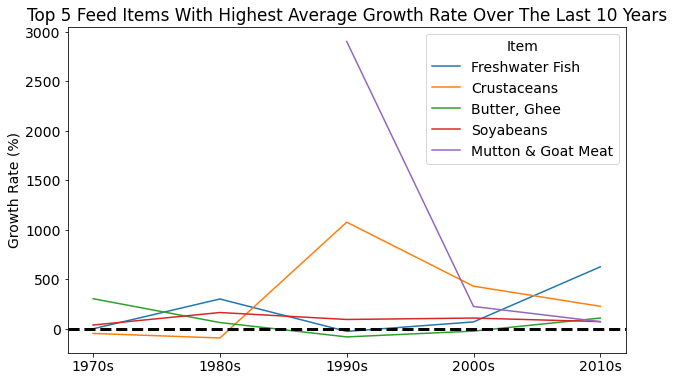

In [30]:
fig, ax = plt.subplots(1, 1)

avg_pct_change_dec.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Top 5 Feed Items With Highest Average Growth Rate Over The Last 10 Years',
                      ax = ax)

ax.axhline(y = 0,color='black', linestyle='--', lw=3)
ax.set_xticks(avg_pct_change_dec.index[1:])
ax.set_xticklabels(['1970s','1980s','1990s','2000s','2010s'])
ax.set_ylabel('Growth Rate (%)')

In [506]:
ts_feed_item_trans['Mutton & Goat Meat']

1961-01-01     0.0
1962-01-01     0.0
1963-01-01     0.0
1964-01-01     0.0
1965-01-01     0.0
1966-01-01     0.0
1967-01-01     0.0
1968-01-01     0.0
1969-01-01     0.0
1970-01-01     0.0
1971-01-01     0.0
1972-01-01     0.0
1973-01-01     0.0
1974-01-01     0.0
1975-01-01     0.0
1976-01-01     0.0
1977-01-01     0.0
1978-01-01     0.0
1979-01-01     0.0
1980-01-01     0.0
1981-01-01     0.0
1982-01-01     0.0
1983-01-01     0.0
1984-01-01     0.0
1985-01-01     0.0
1986-01-01     0.0
1987-01-01     0.0
1988-01-01     1.0
1989-01-01     0.0
1990-01-01     0.0
1991-01-01     2.0
1992-01-01     3.0
1993-01-01     3.0
1994-01-01     3.0
1995-01-01     3.0
1996-01-01     3.0
1997-01-01     4.0
1998-01-01     5.0
1999-01-01     4.0
2000-01-01     7.0
2001-01-01     7.0
2002-01-01     8.0
2003-01-01     9.0
2004-01-01    10.0
2005-01-01    10.0
2006-01-01    13.0
2007-01-01    11.0
2008-01-01    11.0
2009-01-01    12.0
2010-01-01    16.0
2011-01-01    17.0
2012-01-01    17.0
2013-01-01  

Text(0, 0.5, 'Prodcution (1000 tones)')

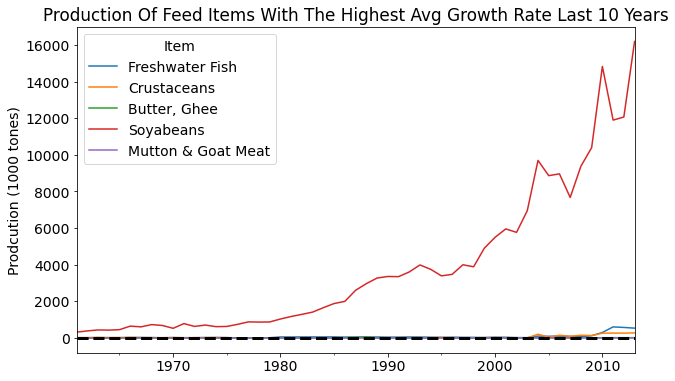

In [358]:
ax = ts_feed_item_trans.loc[:,top5_avg_pct_change.index
                      ].plot(title = 'Production Of Feed Items With The Highest Avg Growth Rate Last 10 Years')

ax.axhline(y = 0,color='black', linestyle='--', lw=3)
ax.set_ylabel('Prodcution (1000 tones)')

## Nationwide Level

### Food and Feed Production By Nation From Year 1961-2013

In [142]:
naiton_total = df.groupby('Area').sum(0).iloc[:,8:].sum(1).sort_values()
naiton_total

Area
Saint Kitts and Nevis           2102.0
Kiribati                        4406.0
Antigua and Barbuda             4446.0
Bermuda                         4933.0
Grenada                         6379.0
                               ...    
Germany                     12300442.0
Brazil                      13818239.0
India                       36549150.0
United States of America    41719176.0
China, mainland             76248859.0
Length: 146, dtype: float64

Text(0.5, 0, 'Production (1000 tones)')

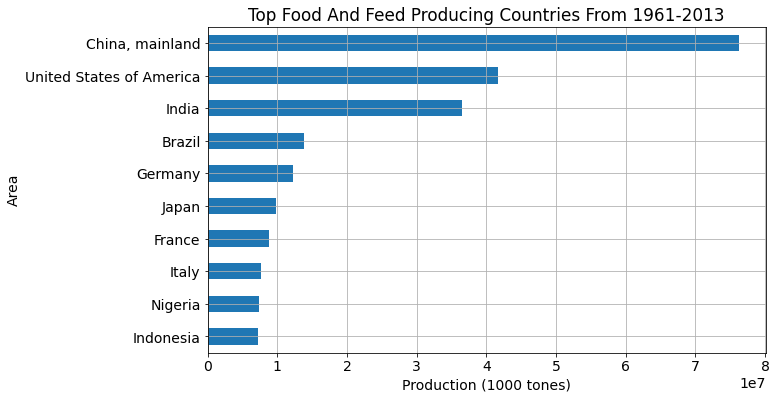

In [513]:
ax = naiton_total.sort_values()[-10:].plot(kind = 'barh',
                                          title = 'Top Food And Feed Producing Countries From 1961-2013',
                                          grid = True)
ax.set_xlabel('Production (1000 tones)')


Text(0.5, 3.200000000000003, 'Production (1000 tones)')

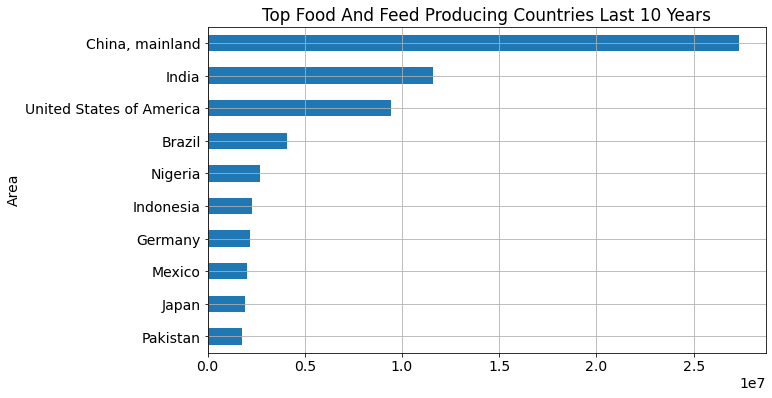

In [512]:
last10y_nation_total = df.groupby('Area').sum(0).iloc[:,-10:].sum(1).sort_values()

last10y_nation_total.sort_values()[-10:].plot(kind = 'barh',
                                              title = 'Top Food And Feed Producing Countries Last 10 Years',
                                              grid = True)
ax.set_xlabel('Production (1000 tones)')

In [152]:
# Time Series of Food and Feed Production of Nation 
nation_food_feed_ts = df.groupby(['Area','Element']).sum(0).iloc[:,7:]

In [347]:
stacked_data = pd.DataFrame(nation_food_feed_ts.stack()).reset_index()
stacked_data.columns = ['Area','Element','Year','Production']
stacked_data.Year = stacked_data.Year.str[1:]
stacked_data.head()

,Area,Element,Year,Production
0,Afghanistan,Feed,1961,720.0
1,Afghanistan,Feed,1962,720.0
2,Afghanistan,Feed,1963,736.0
3,Afghanistan,Feed,1964,740.0
4,Afghanistan,Feed,1965,720.0


Text(0.5, 0.98, 'Comparsion Bewtween Food and Feed Production From 1961-1963')

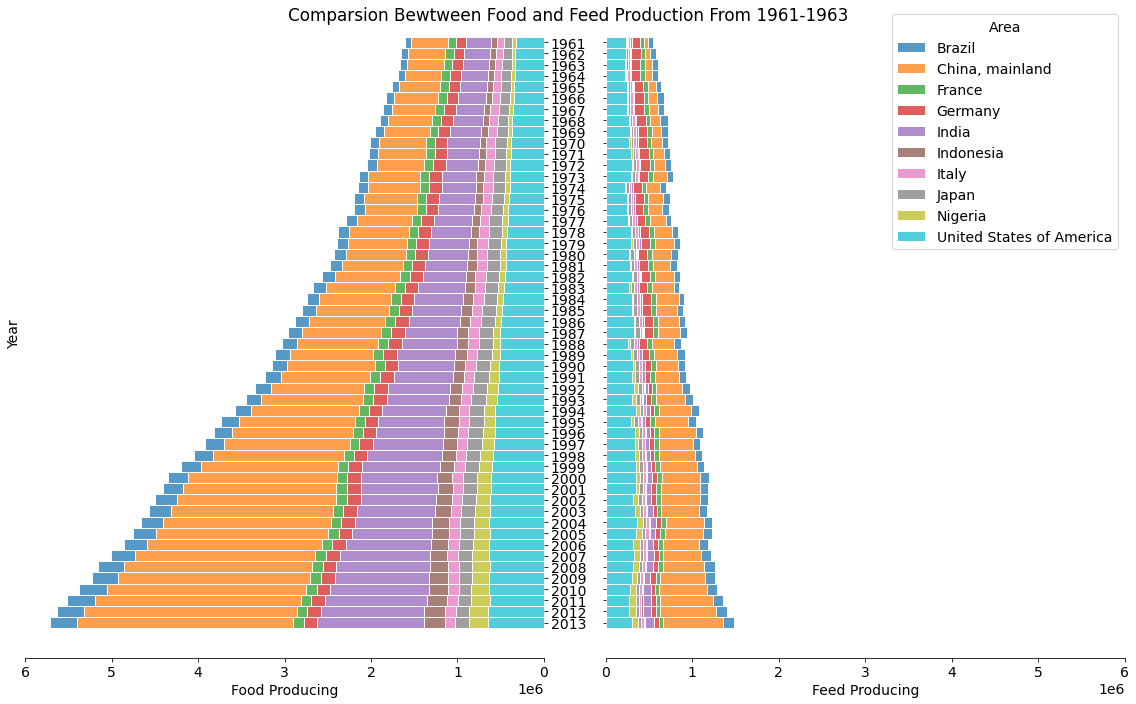

In [503]:
stacked_food = stacked_data.loc[(stacked_data.Area.isin(naiton_total[-10:].index) & (stacked_data.Element == 'Food')),:]
stacked_feed = stacked_data.loc[(stacked_data.Area.isin(naiton_total[-10:].index) & (stacked_data.Element == 'Feed')),:]

fig, axs = plt.subplots(1,2,
                      figsize=(16,10),
                      sharey= True)

sns.histplot(y= 'Year',weights = 'Production',multiple = 'stack',hue = 'Area',data = stacked_food,
             edgecolor = 'white',ax= axs[0],legend = False)

sns.histplot(y= 'Year',weights = 'Production',multiple = 'stack',hue = 'Area',data = stacked_feed,
             edgecolor = 'white',ax= axs[1])

axs[0].set_xlim(0,6e6)
axs[1].set_xlim(0,6e6)

axs[0].set_xlabel('Food Producing')
axs[1].set_xlabel('Feed Producing')


axs[0].yaxis.set_ticks_position('right')
axs[0].invert_xaxis()
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)

fig.tight_layout()
plt.suptitle('Comparsion Bewtween Food and Feed Production From 1961-1963')


In [525]:
nation_food_feed_ts.T.groupby(ts_feed_item_trans.index.year // 10).mean().pct_change().T*100

196         197         198        199        200  \
Area        Element                                                      
Afghanistan Feed     NaN   -2.469172  -15.781631 -10.535628  70.460266   
            Food     NaN   13.647824  -11.003635  15.051060  42.860839   
Albania     Feed     NaN   83.624161   64.400585  31.036016  68.035290   
            Food     NaN   43.841183   30.133738  43.399158  18.806250   
Algeria     Feed     NaN  436.599496  474.503591  -4.471081  54.751549   
...                  ...         ...         ...        ...        ...   
Yemen       Food     NaN   39.022700   66.461848  36.168929  44.281017   
Zambia      Feed     NaN   27.090909  -38.712446   0.700280  30.319889   
            Food     NaN   36.142519   14.436612  29.286608  18.733362   
Zimbabwe    Feed     NaN   71.374322   -9.686610  -9.691553 -22.569377   
            Food     NaN   36.211386   22.833399  17.295171  15.687522   

                            201  
Area        Element              
Afghanistan Feed      48.665753  
            Food      28.327412  
Albania     Feed      33.759087  
            Food      19.303137  
Algeria     Feed      89.872158  
...                         ...  
Yemen       Food      24.446349  
Zambia      Feed     546.744931  
            Food      23.995185  
Zimbabwe    Feed     -38.659148  
            Food      17.808767  

[292 rows x 6 columns]

In [507]:
ts_feed_item_trans = ts_feed_item.transpose()
ts_feed_item_trans.index = pd.to_datetime(ts_feed_item_trans.index.str.replace('Y',''),format= '%Y')

#average growth rate every decade
avg_pct_change_dec = ts_feed_item_trans.groupby(ts_feed_item_trans.index.year // 10).mean().pct_change() * 100
#the average growth rate last decade
avg_pct_change_dec.iloc[-1].sort_values(ascending = False)


Y1961   Y1962   Y1963   Y1964   Y1965   Y1966    Y1967  \
Area        Element                                                            
Afghanistan Feed      720.0   720.0   736.0   740.0   720.0   724.0    788.0   
            Food     8761.0  8694.0  8458.0  9430.0  9753.0  9445.0  10501.0   
Albania     Feed       94.0   108.0   124.0   122.0    95.0   197.0    202.0   
            Food     1612.0  1641.0  1643.0  1767.0  1789.0  1798.0   1844.0   
Algeria     Feed       83.0    94.0    63.0    98.0    84.0    55.0     74.0   

                       Y1968    Y1969   Y1970  ...    Y2004    Y2005    Y2006  \
Area        Element                            ...                              
Afghanistan Feed       826.0    838.0   678.0  ...    704.0   1184.0   1342.0   
            Food     10682.0  10977.0  9776.0  ...  15838.0  16474.0  16975.0   
Albania     Feed       229.0    170.0   185.0  ...    990.0    994.0   1047.0   
            Food      1940.0   2060.0  2210.0  ...   5647.0   5725.0   5864.0   
Algeria     Feed       130.0    113.0   124.0  ...   4575.0   4401.0   4599.0   

                       Y2007    Y2008    Y2009    Y2010    Y2011    Y2012  \
Area        Element                                                         
Afghanistan Feed      1392.0   1294.0   1616.0   1388.0   1192.0   1522.0   
            Food     17856.0  18087.0  19045.0  19642.0  19908.0  21184.0   
Albania     Feed       959.0   1075.0   1134.0   1334.0   1334.0   1312.0   
            Food      5785.0   6093.0   6182.0   6573.0   6780.0   6909.0   
Algeria     Feed      4252.0   3436.0   4839.0   5804.0   7477.0   8549.0   

                       Y2013  
Area        Element           
Afghanistan Feed      1536.0  
            Food     21471.0  
Albania     Feed      1319.0  
            Food      6952.0  
Algeria     Feed      8706.0  

[5 rows x 53 columns]

Text(0.5, 1.0, 'Food and Feed Production From 1961-2013')

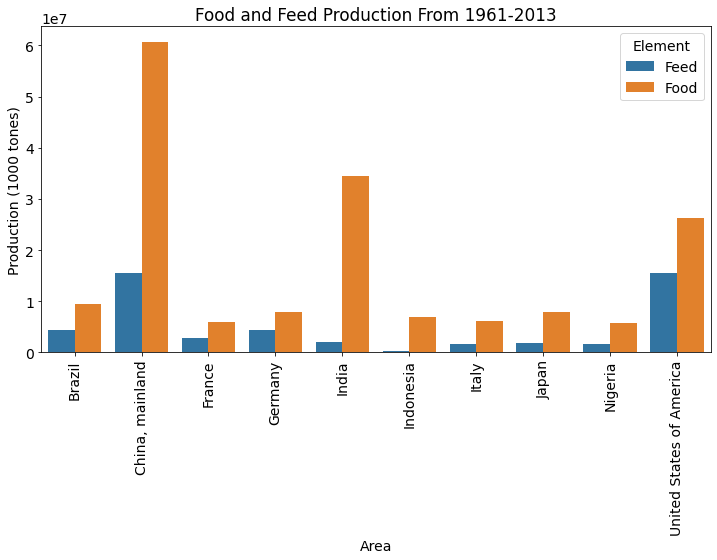

In [154]:
total_nation_food_feed = pd.DataFrame(nation_food_feed_ts.sum(1),columns = ['Total']).reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x ='Area', y ='Total', hue = 'Element', 
            data = total_nation_food_feed[total_nation_food_feed.Area.isin(naiton_total[-10:].index)])

plt.xticks(rotation = 90)
plt.ylabel('Production (1000 tones)')
plt.title('Food and Feed Production From 1961-2013')

Text(0.5, 1.0, 'Food and Feed Production Last 10 Years')

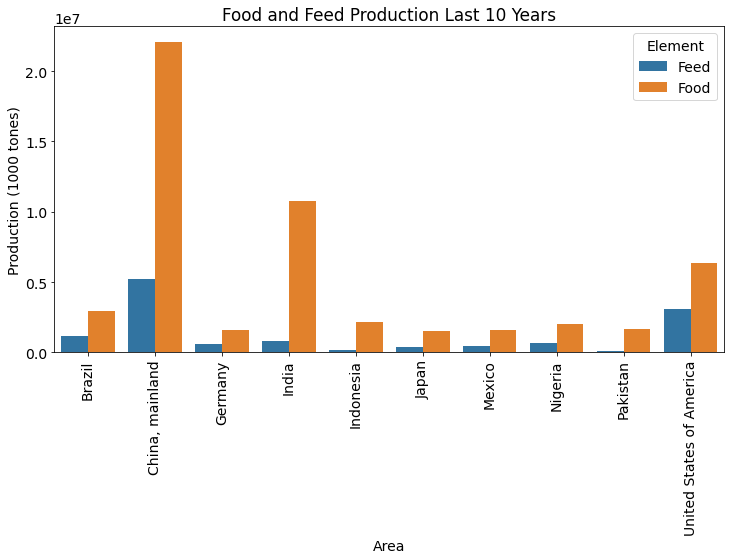

In [155]:
last10y_nation_food_feed = pd.DataFrame(nation_food_feed_ts.iloc[:,-10:].sum(1),columns = ['Total']).reset_index()

plt.figure(figsize = (12,6))
sns.barplot(x ='Area', y ='Total', hue = 'Element', 
            data = last10y_nation_food_feed[last10y_nation_food_feed.Area.isin(last10y_nation_total[-10:].index)])

plt.xticks(rotation = 90)
plt.ylabel('Production (1000 tones)')
plt.title('Food and Feed Production Last 10 Years')

In [158]:
k = nation_food_feed_ts[nation_food_feed_ts.index.get_level_values('Area').isin(naiton_total[-10:].index)]


In [235]:
y = pd.DataFrame(k.stack()).reset_index()

y.columns = ['Area','Element','Year','Total']
y.head()

,Area,Element,Year,Total
0,Brazil,Feed,Y1961,54885.0
1,Brazil,Feed,Y1962,66116.0
2,Brazil,Feed,Y1963,72494.0
3,Brazil,Feed,Y1964,69887.0
4,Brazil,Feed,Y1965,63808.0


In [275]:
plt.figure(figsize = (20,12))
sns.barplot(x = 'level_2',y = 'total',hue = 'Element', palette='tab20c',data = y,ci = None)
plt.xticks(rotation = 90)
plt.title('  ')

ValueError: Could not interpret input 'level_2'

<Figure size 1440x864 with 0 Axes>

In [274]:
sns.histplot(data = y,y = 'Total',x='Year', hue='Area')
plt.xticks(rotation = 90)
plt.title('') 

Text(0.5, 1.0, '')

Error in callback <function flush_figures at 0x7f90286c15e0> (for post_execute):


KeyboardInterrupt: 

In [194]:
plt.stackplot(y = y)

Y1961   Y1962   Y1963   Y1964   Y1965   Y1966    Y1967  \
Area        Element                                                            
Afghanistan Feed      720.0   720.0   736.0   740.0   720.0   724.0    788.0   
            Food     8761.0  8694.0  8458.0  9430.0  9753.0  9445.0  10501.0   
Albania     Feed       94.0   108.0   124.0   122.0    95.0   197.0    202.0   
            Food     1612.0  1641.0  1643.0  1767.0  1789.0  1798.0   1844.0   
Algeria     Feed       83.0    94.0    63.0    98.0    84.0    55.0     74.0   
...                     ...     ...     ...     ...     ...     ...      ...   
Yemen       Food     2815.0  2870.0  2975.0  3049.0  3137.0  3179.0   3248.0   
Zambia      Feed       90.0    90.0    70.0    78.0    88.0    90.0     91.0   
            Food     2886.0  2967.0  2999.0  3043.0  3148.0  3433.0   3597.0   
Zimbabwe    Feed      180.0   216.0   190.0   370.0   498.0   400.0    440.0   
            Food     3080.0  3287.0  3289.0  3368.0  3442.0  3591.0   3762.0   

                       Y1968    Y1969   Y1970  ...    Y2004    Y2005    Y2006  \
Area        Element                            ...                              
Afghanistan Feed       826.0    838.0   678.0  ...    704.0   1184.0   1342.0   
            Food     10682.0  10977.0  9776.0  ...  15838.0  16474.0  16975.0   
Albania     Feed       229.0    170.0   185.0  ...    990.0    994.0   1047.0   
            Food      1940.0   2060.0  2210.0  ...   5647.0   5725.0   5864.0   
Algeria     Feed       130.0    113.0   124.0  ...   4575.0   4401.0   4599.0   
...                      ...      ...     ...  ...      ...      ...      ...   
Yemen       Food      3213.0   3223.0  3184.0  ...  13334.0  13898.0  14633.0   
Zambia      Feed       104.0    124.0   125.0  ...    102.0     70.0     89.0   
            Food      3687.0   3780.0  3881.0  ...   7668.0   7877.0   8188.0   
Zimbabwe    Feed       506.0    518.0   524.0  ...    274.0    251.0    292.0   
            Food      3937.0   3968.0  4190.0  ...   7944.0   7819.0   8289.0   

                       Y2007    Y2008    Y2009    Y2010    Y2011    Y2012  \
Area        Element                                                         
Afghanistan Feed      1392.0   1294.0   1616.0   1388.0   1192.0   1522.0   
            Food     17856.0  18087.0  19045.0  19642.0  19908.0  21184.0   
Albania     Feed       959.0   1075.0   1134.0   1334.0   1334.0   1312.0   
            Food      5785.0   6093.0   6182.0   6573.0   6780.0   6909.0   
Algeria     Feed      4252.0   3436.0   4839.0   5804.0   7477.0   8549.0   
...                      ...      ...      ...      ...      ...      ...   
Yemen       Food     15655.0  15985.0  16657.0  16682.0  16744.0  17929.0   
Zambia      Feed        76.0     94.0    228.0    388.0    568.0    652.0   
            Food      8113.0   8518.0   8984.0   9399.0   9495.0   9859.0   
Zimbabwe    Feed       230.0    249.0    218.0    238.0    225.0    254.0   
            Food      8315.0   8243.0   8718.0   9063.0   9464.0   9661.0   

                       Y2013  
Area        Element           
Afghanistan Feed      1536.0  
            Food     21471.0  
Albania     Feed      1319.0  
            Food      6952.0  
Algeria     Feed      8706.0  
...                      ...  
Yemen       Food     18325.0  
Zambia      Feed       816.0  
            Food     10180.0  
Zimbabwe    Feed       262.0  
            Food      9524.0  

[292 rows x 53 columns]